# Grundlagen der Künstlichen Intelligenz - Wintersemester 2024/25


# Übung 3: Neuronale Netzwerke und Backpropagation

---

> 'Grundlagen der künstlichen Intelligenz' im Wintersemester 2024/2025
>
> - T.T.-Prof. Benjamin Schäfer, benjamin.schaefer@kit.edu
> - Prof. Gerhard Neumann, gerhard.neumann@kit.edu

---

### Übungsteam

- Sebastian Pütz, sebastian.puetz@kit.edu
- Ulrich Oberhofer, ulrich.oberhofer@kit.edu
- Philipp Dahlinger, philipp.dahlinger@kit.edu
- Nicolas Schreiber, nicolas.schreiber@kit.edu

# Gruppenabgabe

Die Übungsblätter können in Gruppen von bis zu **3 Studierenden** abgegeben werden. **Jede Person aus der Gruppe muss die finale Version der Abgabe über Ilias hochladen**, es genügt nicht, dass nur eine Person aus der Gruppe dies tut. Es ist prinzipiell möglich, im Laufe des Semesters sich einer neuen Gruppe anzuschließen, sollte sich die eigene Gruppe vorzeitig auflösen. Generell muss jede Gruppe ihre eigene Lösung hochladen, wir werden die Abgaben auf Duplikate überprüfen.

Die Gruppen werden automatisch erfasst, **gebt deshalb die u-Kürzel eurer Gruppenmitglieder in die folgende Zelle ein.** Falls eure Gruppe nur aus 2 Studierenden besteht, oder ihr alleine abgibt, lasst die verbleibenden Felder frei. Hier ein Beispiel für eine Gruppe bestehend aus uabcd und uefgh:

_U-Kürzel der Gruppenmitglieder:_

_Mitglied 1: uabcd_

_Mitglied 2: uefgh_

_Mitglied 3:_


U-Kürzel der Gruppenmitglieder:

Mitglied 1:

Mitglied 2:

Mitglied 3:


# Auto-grading

Wir nutzen ein auto-grading System, welches eure abgegebenen Jupyter Notebooks automatisch analysiert und über
hidden Tests auf Richtigkeit prüft. Über diese Tests werden die Punkte bestimmt, die ihr für das Übungsblatt erhaltet.

Damit das auto-grading reibungslos funktioniert bitte folgende Dinge beachten:

- Vor dem Abgeben eines Notebooks bitte testen, dass alles von vorne bis hinten ohne Fehler durchläuft.
- Zellen, welche mit "### DO NOT CHANGE ###" markiert sind dürfen weder gelöscht noch bearbeitet werden
- Eure Lösung muss in die richtige Zelle (markiert mit "# YOUR CODE HERE") eingetragen werden.
    - (dabei natürlich den NotImplementedError löschen!)
- Es gibt potentiell scheinbar leere Zellen, die auch mit "### DO NOT CHANGE ###" markiert sind. Auch diese dürfen nicht bearbeitet oder gelöscht werden.
    - Falls dies doch gemacht wird, dann wird das automatische Grading nicht funktionieren und ihr erhaltet keine Punkte.
    - Wir werden hier strikt handeln und keine Ausnahmen machen, falls jemand doch Zellen verändert, die eindeutig als readonly markiert sind!
- Die Jupyter Notebooks haben inline Tests (für euch sichtbar), welche euer Ergebnis auf grobe Richtigkeit überprüfen.
    - Diese sind primär für euch, um Fehler zu erkennen und zu korrigieren.
    - Die inline Tests, die ihr im Notebook sehen könnt, sind allerdings nicht die Tests welche für das Grading verwendet werden!
    - Die inline Tests sind eine notwendige Bedingung, um beim Grading der Aufgabe Punkte zu erhalten!

# **WICHTIG** Abgabe des Notebooks
- Bitte das Jupyter Notebook mit dem ursprünglichen Dateinamen ins Ilias hochladen ("ex_03_neural_networks.ipynb")
- Bitte Jupyter Notebook und handgeschriebene PDF einzeln hochladen, nicht als ZIP.
- Bitte darauf achten, dass die Jupyter Notebook Zell-Metadaten erhalten bleiben. Das ist eigentlich immer der Fall,
in wenigen Fällen gab es hier jedoch Probleme. Um auf Nummer Sicher zu gehen bitte das Notebook vor der Abgabe ein Mal
in einem normalen Texteditor öffnen und nach "nbgrader" suchen. Wenn hier dann keine entsprechenden JSON-Einträge auftauchen
dann sind leider die Metadaten verloren gegangen.

In [1]:
import os
import gzip
from typing import Tuple, List
from tqdm.notebook import tqdm

import numpy as np

import matplotlib.pyplot as plt

import torchvision

In dieser Übung werden wir ein einfaches, vollständig verbundenes neuronales Netz (fully-connected neural network) mit Hilfe von NumPy selbst implementieren. Der Fokus liegt dabei auf der Implementierung der Backpropagation, einem zentralen Bestandteil des Trainings neuronaler Netze.

Anschließend wirst du dein Netzwerk auf den MNIST-Datensatz anwenden. Dieser Datensatz besteht aus 28x28 Pixel großen Graustufenbildern handgeschriebener Ziffern, die jeweils mit einem passenden Label versehen sind.

Zunächst laden wir den MNIST-Datensatz herunter:

In [2]:
# define utility functions to load the mnist dataset

def load_mnist_images(filename: str) -> np.ndarray:
    """Load mnist images from the given gzip file."""
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
        data = data.reshape(-1, 28, 28)
    return data

def load_mnist_labels(filename: str) -> np.ndarray:
    """Load mnist labels from the given gzip file."""
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [3]:
# Ensure MNIST dataset is downloaded
data = torchvision.datasets.MNIST('./', download=True)

# Define file paths for MNIST dataset
files = {
    "train_images": "MNIST/raw/train-images-idx3-ubyte.gz",
    "train_labels": "MNIST/raw/train-labels-idx1-ubyte.gz",
    "test_images": "MNIST/raw/t10k-images-idx3-ubyte.gz",
    "test_labels": "MNIST/raw/t10k-labels-idx1-ubyte.gz"
}

# Load the MNIST dataset
train_images = load_mnist_images(files["train_images"]).reshape(-1, 28 * 28)  # Flatten images
train_labels = load_mnist_labels(files["train_labels"])
test_images = load_mnist_images(files["test_images"]).reshape(-1, 28 * 28)  # Flatten images
test_labels = load_mnist_labels(files["test_labels"])

# Convert labels to one-hot encoding
train_labels = np.eye(10)[train_labels]
test_labels = np.eye(10)[test_labels]

# Display dataset shapes
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:13<00:00, 748545.82it/s] 


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 87218.26it/s]


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:05<00:00, 276006.46it/s]


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 906304.89it/s]


Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw

Training images shape: (60000, 784)
Training labels shape: (60000, 10)
Testing images shape: (10000, 784)
Testing labels shape: (10000, 10)


Als nächstes lassen wir für jedes Label ein Beispiel aus dem Datensatz anzeigen:

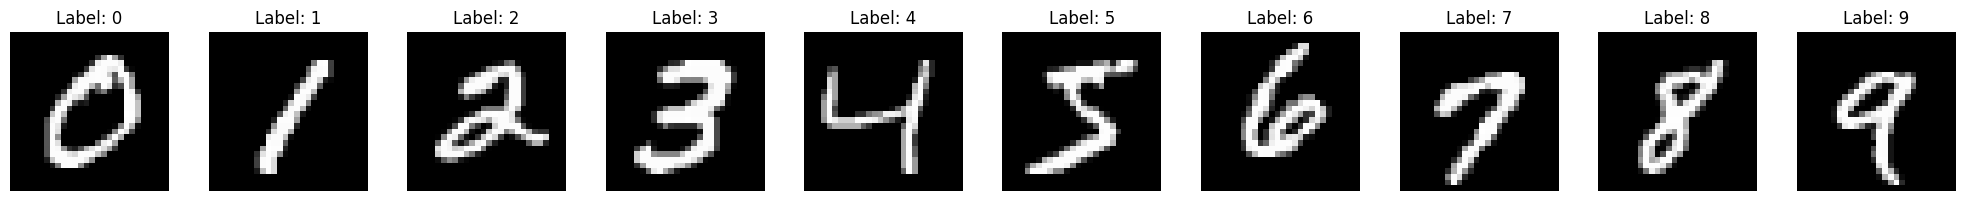

In [4]:
# Convert images back to 28x28 shape for displaying
train_images_display = train_images.reshape(-1, 28, 28)

# Find one example for each label
unique_labels = np.unique(np.argmax(train_labels, axis=1)) # np.unique returns sorted array
n_labels = len(unique_labels)

# Plot one example for each label
fig, axes = plt.subplots(1, n_labels, figsize=(n_labels * 2, 2))
for ax, label in zip(axes, unique_labels):
    idx = np.argmax(train_labels, axis=1) == label # Find the images with the current label
    ax.imshow(train_images_display[idx][0], cmap='gray') # Plot the first matching image
    ax.set_title(f"Label: {label}") # Add title with the label
    ax.axis('off') # Turn off axis to only show the images
    
plt.tight_layout()
plt.show()

Es ist üblich, die Ipnput-daten von neuronalen Netzen zu skalieren. Dies sorgt dafür, dass die verschiedenen Features auf derselben Skala liegen, was die Konvergenz des Trainings verbessert (Stichwort: ill-conditioned Hessian).

Eine häufig genutzte Methode ist die Standardisierung, bei der für jedes Merkmal der Mittelwert subtrahiert und durch die Standardabweichung geteilt wird (“standard scaler”). Da wir hier jedoch mit 2D-Bildern arbeiten, ist es wenig sinnvoll, jedes Feature/jeden Pixel separat zu normalisieren. Stattdessen skalieren wir die Werte, indem wir sie einfach durch 255.0 teilen (Der Datensatz enthält 8-bit Bilder: 0=schwarz und 255=weiß). So liegen alle Pixelwerte im Bereich $[0, 1]$.

In [5]:
# Scale images to [0, 1] range
train_images = train_images / 255.0 
test_images = test_images / 255.0   

# Confirm scaling
print(f"Scaled training images range: [{train_images.min()}, {train_images.max()}]")
print(f"Scaled testing images range: [{test_images.min()}, {test_images.max()}]")

Scaled training images range: [0.0, 1.0]
Scaled testing images range: [0.0, 1.0]


# Aufgabe 2.1 - Implementierung des DataLoaders (1 Punkt)

Nun implementieren wir einen sogenannten `DataLoader`. Dieser hat die Aufgabe, unsere NumPy-Arrays in Batches für das Training aufzuteilen.
Später werden wir sehen, dass wir über unseren `DataLoader`einfach iterieren können, um in jeder Iteration eine neue Batch von Daten und den zugehörigen Labels zu erhalten.

Vervollständigt den folgenden DataLoader an der markierten Stelle.

In [8]:
class DataLoader:
    """
    A DataLoader-like object for iterating over arrays and returning batches of data.
    """

    def __init__(
            self, 
            *arrays, 
            batch_size=32, 
            shuffle=False,
            drop_last=True
        ):
        """
        Initialize a DataLoader.

        *arrays (np.ndarrays): Arrays to store. Must have the same length @ dim 0.
        batch_size (int): Batch size to use when iterating
        shuffle (bool): If True, shuffle the data *in-place* whenever an
            iterator is created out of this object.
        drop_last (bool): If True, drop the last incomplete batch if the dataset size is not 
            divisible by the batch size. If False, the last batch will include remaining samples.
        """

        # Ensure all arrays have the same number of samples
        if not all(array.shape[0] == arrays[0].shape[0] for array in arrays):
            raise ValueError("All input arrays must have the same number of samples (size along dimension 0).")

        self.arrays = arrays
        self.dataset_len = self.arrays[0].shape[0]
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.drop_last = drop_last

        # Calculate the number of batches
        self.n_batches, remainder = divmod(self.dataset_len, self.batch_size)
        if not self.drop_last and remainder > 0:
            self.n_batches += 1

    def __iter__(self):
        """
        Create an iterator for the DataLoader.
        If shuffle is True, shuffles the data before returning the iterator.
        """
        if self.shuffle:
            indices = np.random.permutation(self.dataset_len)
            self.arrays = tuple(array[indices] for array in self.arrays)
        self.i = 0
        return self

    def __next__(self):
        """
        Return the next batch of data.
        """
        if self.i >= self.dataset_len or (
            self.drop_last and (self.dataset_len - self.i) < self.batch_size
        ):
            raise StopIteration
        
        # Hier wollen wir ein Tupel zurückgeben, wobei jeder Eintrag eine Batch des entsprechenden Arrays in self.arrays ist.
        # Wenn wir beispielsweise "x" und "y" als Arrays an unseren DataLoader im Konstruktor übergeben haben,
        # soll das Tupel am Ende eine Batch (basierend auf der aktuellen Position self.i) von x und eine Batch von y enthalten.
        # Vergiss am Ende nicht, self.i zu updaten.
        
        ### BEGIN SOLUTION
        batch = tuple(array[self.i:self.i+self.batch_size] for array in self.arrays)
        self.i += self.batch_size
        return batch
        ### END SOLUTION

    def __len__(self):
        """
        Return the number of batches.
        """
        return self.n_batches

In [9]:
# Self-check
train_dataloader = DataLoader(
    np.array([5.0, 3.0, 2.0, 1.0, 5.0]), 
    np.array([4.0, 5.0, 2.0, 3.0, 4.0]), 
    batch_size=1, 
    shuffle=False, 
    drop_last=False
)

# Check number of batches
assert len(train_dataloader) == 5, "Number of batches should be 5"
# Check the first batch
assert np.all(np.isclose(
    next(iter(train_dataloader)), 
    (np.array([5.0]), np.array([4.0]))
)), "First batch does not match expected output"

# Aufgabe 2.2 - Softmax und Ableitungen für die Gradientenberechnung (1+1+1 Punkt)

Als nächstes müssen wir die Backpropagation (und den forward pass) implementieren.
Dazu benötigen wir zunächst etwas Vorarbeit:

Vervollständige in der folgenden Zelle die letzten drei Funktionen. Nutze dafür die Ergebnisse vom handschriftlichen Teil dieser Übung.

In [10]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    """
    Computes the sigmoid activation function.
    Args:
        z: Input array with arbitrary dimensions.
    Returns:
        The sigmoid function applied to each entry in the input array.
        Returns an array with the same dimensions as the input.
    """
    return 1.0 / (1.0 + np.exp(-z))

def softmax(z: np.ndarray) -> np.ndarray:
    """
    Computes the softmax activation function.
    Args:
        z: Input array with dimensions (Number of classes, Number of samples in batch).
    Returns:
        The softmax of the input with dimensions (Number of classes, Number of samples in batch).
    """
    ### BEGIN SOLUTION
    return np.exp(z) / np.sum(np.exp(z), axis=0, keepdims=True)
    ### END SOLUTION

def sigmoid_derivative(z: np.ndarray) -> np.ndarray:
    """
    Computes the derivative of the sigmoid activation function (see exercise sheet equation 4).
    Args:
        z: Input array with arbitrary dimensions.
    Returns:
        The derivative of the sigmoid function for each entry in the input array.
        Returns an array with the same dimensions as the input.
    """
    ### BEGIN SOLUTION
    return sigmoid(z) * (1 - sigmoid(z))
    ### END SOLUTION

def dL_dz(a: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Computes the derivative of the loss with respect to z for a sample y.
    This represents the "delta" of the last layer in backpropagation (see exercise sheet equation 9).
    Args:
        a (np.ndarray): Predicted output (activation of the last layer) usually of shape (Number of samples in batch, Number of classes).
        y (np.ndarray): True label for the sample usually of shape (Number of samples in batch, Number of classes).
    Returns:
        Derivative of the loss with respect to z of same shape as a and y.
    """
    ### BEGIN SOLUTION
    return (a - y)
    ### END SOLUTION


In [11]:
# Self-check
assert np.all(np.isclose(np.sum(softmax(np.array([[6, 5, 4], [3, 2, 1]])), axis=0), np.array([1.0, 1.0, 1.0]))), "Softmax does not sum to 1 for each sample"
assert np.all(np.isclose(sigmoid_derivative(np.array([0, 0])), np.array([0.25, 0.25]))), "Sigmoid derivative is not correct for z=0"
assert np.all(np.isclose(dL_dz(np.array([[0.5, 0.5]]), np.array([[1, 0]])), np.array([[-0.5, 0.5]]))), "dL_dz is not correct"

# Aufgabe 2.3 - Cross-Entropy Loss und Accuracy (1+1 Punkte)

Außerdem benötigen wir Funktionen, um die Accuracy und den Loss zu berechnen. Implementiert dafür die beiden Funktionen `loss` und `accuracy` in der folgenden `Network` Klasse. Die Funktionen sollen den mean cross-entropy loss und die mean accuracy gemittelt über alle Samples in der Batch zurückgeben.

# Aufgabe 2.4 - Implementierung des forward und backward pass (2+3 Punkte)

Nun implementieren wir den forward pass und die backpropagation. Hierbei helfen wieder die Formeln, welche wir im schriftlichen Teil der Übung hergeleitet haben.
Implementiert den Code für den forward pass und den backward pass in der folgenden Klasse (siehe die markierten Stellen).

Bei der Implementierung ist es sehr wichtig, die Dimensionen der Arrays in den verschidenen Schritten zu berücksichtigen. Um den Überblick zu behalten und Fehler zu vermeiden, haben wir die Dimensionen der Arrays in den Kommentaren notiert. Hierbei wurden die folgenden Variablennamen verwendet:

- `N` - Anzahl der Samples in der Batch
- `C` - Anzahl der Klassen (10 für den MNIST-Datensatz)
- `D` - Anzahl der Input-Features (Anzahl der Pixel in einem Bild; 28x28=784 für den MNIST-Datensatz)

In [12]:
class Network:
    """
    A simple feedforward neural network implementation in NumPy.
    """
    def __init__(self, structure: List[int], batch_size: int, learning_rate: float):
        """
        Initialize the network.

        Args:
            structure (List[int]): List of layer sizes.
            batch_size (int): Batch size for training.
            learning_rate (float): Learning rate for gradient descent.
        """
        self.structure = structure
        self.num_layers = len(structure) 
        self.batch_size = batch_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.Ws = [np.random.randn(prev_l, l) for prev_l, l in zip(structure[:-1], structure[1:])] # shape: (Neurons in previous layer, Neurons in current layer)
        self.Bs = [np.random.randn(l, 1) for l in structure[1:]] # shape: (Neurons in current layer, 1)

        # Initialize gradients
        self.dL_dWs = [np.zeros_like(W) for W in self.Ws] # Gradient of loss with respect to weights (same shape as weights)
        self.dL_dBs = [np.zeros_like(B) for B in self.Bs] # Gradient of loss with respect to biases (same shape as biases)

        # Initialize intermediate values for forward/backward passes
        self.Zs = [np.zeros((layer_size, batch_size)) for layer_size in structure[1:]]  # Exclude input layer
        self.As = [np.zeros((layer_size, batch_size)) for layer_size in structure]  # Include input layer to include input data as activation (As[0])

    def loss(self, y: np.ndarray, y_predicted: np.ndarray) -> float:
        """
        Computes the categorical cross-entropy loss.

        Args:
            y (np.ndarray): One-hot encoded true labels of shape (N,C).
            y_predicted (np.ndarray): Predicted probabilities of shape (N,C).

        Returns:
            float: Loss value.
        """
        ### BEGIN SOLUTION
        return -np.mean(np.sum(y * np.log(y_predicted), axis=1))
        ### END SOLUTION
    
    def accuracy(self, y: np.ndarray, y_predicted: np.ndarray) -> float:
        """
        Computes the accuracy.

        Args:
            y (np.ndarray): One-hot encoded true labels of shape (N,C).
            y_predicted (np.ndarray): Predicted probabilities of shape (N,C).

        Returns:
            float: Accuracy value.
        """
        ### BEGIN SOLUTION
        return np.mean(np.argmax(y, axis=1) == np.argmax(y_predicted, axis=1))
        ### END SOLUTION

    def forward(self, x: np.ndarray) -> np.ndarray:
        """
        Performs a forward pass through the network.

        Args:
            x (np.ndarray): Input data of shape (N, D).

        Returns:
            np.ndarray: Output predictions of shape (N, C).
        """
        x = x.T  # Transpose for matrix multiplication (N,D) -> (D,N)

        self.As[0] = x  # The first "activation" is just the input

        for i, (W, B) in enumerate(zip(self.Ws, self.Bs)):

            current_input = self.As[i]  # Use stored activations for input to the next layer

            # Berechne hier die Werte für z und a des aktuellen Layers:
            # 1. Berechne z, den gewichteten Summenvektor für das aktuelle Layer, basierend auf den Gewichten W,
            #    den Biases B und den Eingaben (current_input).
            # 2. Bestimme die Aktivierung a des aktuellen Layers:
            #    - Verwende die Sigmoid-Aktivierungsfunktion für alle versteckten Layer.
            #    - Verwende die Softmax-Aktivierungsfunktion für das letzte Layer. 
            #    - Nutze die Sigmoid und Softmax-funktionen aus Aufgabe 2.2
            # 
            # Stelle sicher, dass die Shapes der Variablen z und a korrekt sind:
            #    - z sollte die Shape (Neuronen im aktuellen Layer, N) haben
            #    - a sollte dieselbe Shape wie z haben


            ### BEGIN SOLUTION

            z = W.T @ current_input + B # Could use np.matmul instead of @

            if i < (len(self.Ws) - 1):
                a = sigmoid(z)
            else:
                # Softmax
                a = softmax(z)

            ### END SOLUTION

            self.Zs[i] = z
            self.As[i + 1] = a  # Store activations for the next layer

        return a.T # Transpose back to (N,C)

    def forward_backward(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Perform a forward and backward pass for a batch of samples.
        After calling this function, self.dL_dWs will contain the gradient of the loss function with respect 
        to the weights of each layer, averaged over the batch

        Args:
            x (np.ndarray): Input data of shape (N, D).
            y (np.ndarray): One-hot encoded labels of shape (N, C).

        Returns:
            np.ndarray: Output predictions of shape (N, C).
        """

        #####  Forward pass #####

        # In the forward pass, we have to store the intermediate values for all layers and all samples,
        # in order to be able to reuse them during the backward pass.

        y_predicted = self.forward(x)

        #####  Backward pass #####
        x = x.T # (N, D) -> (D, N) for easier matrix multiplication
        y = y.T # (N, C) -> (C, N) for easier matrix multiplication
        H = self.num_layers - 1

        for L in range(H, 0, -1): # Iterate over all layers, starting from the last layer (H) down to the first layer (1)

            # Da die Indizes in Python bei 0 beginnen, müssen wir darauf achten, dass wir die Indizes für die Layer richtig verwenden.
            # Für self.As stimmt der Index mit dem Layer überein, d.h. self.As[0] enthält die Eingabe, self.As[1] die Aktivierung von Layer 1, etc.
            # Für self.Ws, self.Bs und self.Zs haben wir jedoch den Index um 1 verschoben, d.h. self.Zs enthält den Pre-Aktivierungswert von Layer L in self.Zs[L - 1].
            # Das gleiche gilt für self.dL_dWs und self.dL_dBs, die den Gradienten bezüglich der Gewichte und Biases enthalten und in dieser Funktion berechnet werden. 
            #
            # 1. Berechne delta für das aktuelle Layer (siehe Übungsblatt):
            #    - Im letzten Layer (L == H) berechnest du delta mithilfe von dL_dz(), welches die Differenz 
            #      zwischen der vorhergesagten Ausgabe (self.As[L]) und den Labels y liefert.
            #    - Für alle anderen Layer berechnest du delta mithilfe von sigmoid_derivative(self.Zs[L - 1])
            #      und der Matrixmultiplikation mit den Gewichten des nächsten Layers (self.Ws[L])
            # 
            # 2. Aktualisiere die Gradienten:
            #    - self.dL_dWs[L - 1]: Der Gradient bezüglich der Gewichte im aktuellen Layer.
            #      - Berechne den Gradient, indem du die letzten Aktivierungen (self.As[L - 1]) mit delta multiplizierst (siehe Übungsblatt Gleichung 7)
            #      - Mittel die Ergebnisse über die Batch-Dimension
            #    - self.dL_dBs[L - 1]: Der Gradient bezüglich der Biases im aktuellen Layer (siehe Übungsblatt Gleichung 8)
            #      - Berechne den Gradient als Mittelwert von delta über die Batch-Dimension
            # 
            # Hinweise:
            # - Verwende die gespeicherten Werte in self.As und self.Zs für die Aktivierungen und Pre-Aktivierungen.
            # - delta kann jeweils überschrieben werden
            # - Achte darauf, dass delta, self.dL_dWs[L - 1] und self.dL_dBs[L - 1] die korrekten Shapes haben:
            #   - delta hat die Shape (Neuronen im aktuellen Layer, N)
            #   - self.dL_dWs[L - 1] hat die Shape (Neuronen im vorherigen Layer, Neuronen im aktuellen Layer)
            #   - self.dL_dBs[L - 1] hat die Shape (Neuronen im aktuellen Layer, 1)


            ### BEGIN SOLUTION

            # Berechne delta für das aktuelle Layer
            if L == H:
                delta = dL_dz(self.As[L], y)
            else:
                delta = sigmoid_derivative(self.Zs[L - 1]) * (self.Ws[L - 1 + 1] @ delta)

            # self.As[L - 1] ist (Neuronen im vorherigen Layer, N), delta ist (Neuronen der aktuellen Layer, N)
            # Wir wollen jedes Neuron in dem vorherigen Layer mit jedem Neuron in dem aktuellen Layer multiplizieren (Übungblatt Gleichung 7)
            # Dies geschieht durch Hinzufügen einer neuen Achse zu jedem Array und anschließende Multiplikation
            # Das Ergebnis ist ein 3D-Array mit der Form (Neuronen im vorherigen Layer, Neuronen im aktuellen Layer, N)
            # Wir nehmen dann den Mittelwert über die letzte Achse, um den durchschnittlichen Gradienten über die batch dimension zu erhalten
            self.dL_dWs[L - 1] = np.mean(self.As[L - 1][:, None, :] * delta[None, :, :], axis=-1) 

            # alternativ kann auch beispielsweise np.einsum verwendet werden:
            # self.dL_dWs[L - 1] = np.mean(np.einsum('ik,jk->ijk', self.As[L - 1], delta), axis=-1)

            # Der Gradient bezüglich der Biases ist einfach der Mittelwert von delta über die Batch-Dimension (Übungblatt Gleichung 8)
            self.dL_dBs[L - 1] = np.mean(delta, axis=-1, keepdims=True)

            ### END SOLUTION

        return y_predicted


    def gradient_descent(self, x: np.ndarray, y: np.ndarray) -> Tuple[float, float]:
        """
        Perform a gradient descent step.

        Args:
            x (np.ndarray): Input data of shape (N, D).
            y (np.ndarray): One-hot encoded labels of shape (N, C).

        Returns:
            Tuple[float, float]: Loss and accuracy for the batch.
        """

        y_predicted = self.forward_backward(x, y) # Process batch
        loss = self.loss(y, y_predicted)
        accuracy = self.accuracy(y, y_predicted)

        # Update weights and biases
        for i in range(len(self.Ws)):
            self.Ws[i] -= self.learning_rate * self.dL_dWs[i]
            self.Bs[i] -= self.learning_rate * self.dL_dBs[i]

        return loss, accuracy

    def test(self, test_dataloader) -> Tuple[float, float]:
        """
        Evaluate the network on a test dataset.

        Args:
            test_dataloader: DataLoader object for the test dataset.

        Returns:
            Tuple[float, float]: Average loss and accuracy on the test dataset.
        """

        total_loss = 0.0
        total_accuracy = 0.0

        for x, y in test_dataloader:
            y_predicted = self.forward(x)
            total_loss += self.loss(y, y_predicted)
            total_accuracy += self.accuracy(y, y_predicted)

        avg_loss = total_loss / len(test_dataloader)
        avg_accuracy = total_accuracy / len(test_dataloader)

        return avg_loss, avg_accuracy

    def fit(self, train_dataloader, test_dataloader, epochs: int, test_loss_frequency: int = 1):
        """
        Train the network.

        Args:
            train_dataloader: DataLoader object for the training dataset.
            test_dataloader: DataLoader object for the test dataset.
            epochs (int): Number of epochs.
            test_loss_frequency (int): Frequency for testing the network.

        Returns:
            Tuple[List[float], List[float]]: Training losses and accuracies over epochs.
        """
        losses = []
        accuracies = []

        last_test_loss = None
        last_test_accuracy = None
        
        # Train the network
        for epoch in (pbar := tqdm(range(epochs))): # Did you know about the walrus operator := ?
            total_loss = 0.0
            total_accuracy = 0.0

            # Iterate over all batches
            for x, y in train_dataloader:
                loss, accuracy = self.gradient_descent(x, y) # Performs a forward and backward pass and updates weights

                total_loss += loss
                total_accuracy += accuracy

            avg_loss = total_loss / len(train_dataloader)
            avg_accuracy = total_accuracy / len(train_dataloader)

            if (epoch + 1) % test_loss_frequency == 0:
                last_test_loss, last_test_accuracy = self.test(test_dataloader)

            pbar.set_description(f"Epoch {epoch + 1}, Loss: {avg_loss:.3f}, Accuracy: {avg_accuracy:.3f}; Test Loss: {last_test_loss:.3f}, Test Accuracy: {last_test_accuracy:.3f}")

            losses.append(avg_loss)
            accuracies.append(avg_accuracy)

        return losses, accuracies

In [13]:
# self-check
network = Network([784, 128, 64, 10], batch_size=32, learning_rate=0.01)

# check accuracy and cross-entropy
y = np.array([[0, 1], [1, 0], [1, 0], [0, 1]]) # here we have 4 samples and 2 classes instead of 10
y_predicted = np.array([[0.1, 0.9], [0.8, 0.2], [0.7, 0.3], [0.2, 0.8]])

assert np.isclose(network.accuracy(y, y_predicted), 1.0), "Accuracy should be 1"
assert np.isclose(network.loss(y, y_predicted), 0.2, atol=0.05), "Loss calculation is incorrect"

Wie ihr sehen könnt, benötigt es tatsächlich nicht viele Zeilen Code, um Backpropagation selbst zu implementieren!

Da das Training mit NumPy jedoch recht zeitintensiv ist (insbesondere, für 300+ Studierenden) und das unser Auto-Grading erschweren würde, endet der bewertete Teil des Notebooks an dieser Stelle.

Im folgenden Abschnitt könnt ihr versuchen das Netzwerk selbst auf die MNIST-Daten fitten und so überprüfen ob eure Implementierung funktioniert. Eure Aufgabe ist es, geeignete Hyperparameter wie `epochs`, `learning_rate` und `batch_size` zu finden, um die Performance des Modells zu maximieren.
Was ist die höchste Accuracy, die ihr erzielen könnt?

Zusätzlich könnt ihr hier die Auswirkungen von Overfitting auszuprobieren:
- Verwende dazu einen DataLoader mit deutlich weniger Trainingsbildern.
- Fitte ein vergleichsweise großes Modell auf diesen reduzierten Datensatz.

Wie verhalten sich der Trainings- und Testfehler?

In [17]:
# First, let's define some training hyperparameters:

epochs: int = None
learning_rate: float = None
batch_size: int = None
network_structure = [] # [train_images.shape[1], ..., 10] # Hier kannst du auch mit verschiedenen hidden layer sizes experimentieren

# Wird nicht bewertet!

### BEGIN SOLUTION
epochs = 10
learning_rate = 0.1
batch_size = 64
network_structure = [train_images.shape[1], 128, 10]
### END SOLUTION

# Construct dataloaders for the training and test sets
# These dataloaders enable easy iteration over batches of data during training and evaluation.
train_dataloader = DataLoader(
    train_images, 
    train_labels, 
    batch_size=batch_size, 
    shuffle=True,  # Shuffle training data 
    drop_last=True  # Drop incomplete batches
)

test_dataloader = DataLoader(
    test_images, 
    test_labels, 
    batch_size=batch_size, 
    shuffle=False,  # Do not shuffle test data
    drop_last=True  # Drop incomplete batches
)

In [18]:
# Calculate the total number of parameters in the network
n_params = 0  # Initialize the parameter counter

# Iterate through each pair of consecutive layers to compute parameters
for input_size, output_size in zip(network_structure[:-1], network_structure[1:]):
    n_params += (input_size + 1) * output_size  # Add weights and biases for each layer

print(f"Total number of parameters in the network: {n_params}")

Total number of parameters in the network: 101770


In [19]:
grading_env_var = os.getenv('NBGRADER_EXECUTION', None)
is_grading = (grading_env_var == "autograde" or grading_env_var == "validate")

# Falls ihr hier etwas ändert, bitte darauf achten, dass diese If-Abfrage nicht entfernt wird.
# Ansonsten wird das auto-grading zu lange dauern und abbrechen.
if not is_grading:
    network = Network(network_structure, batch_size, learning_rate)
    losses, accuracies = network.fit(train_dataloader, test_dataloader, epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
if not is_grading:

    # Plot the loss curve:
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label="Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot the accuracy curve:
    plt.figure(figsize=(10, 5))
    plt.plot(accuracies, label="Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

### Abschließende Bemerkungen
Wir hoffen, dass dir diese Übung einen guten Einblick geben konnte, wie neuronale Netze tatsächlich funktionieren. Der Workflow, den wir hier gezeigt haben, ähnelt stark dem, den du bei realen Machine-Learning-Problemen verwenden würdest – mit dem Unterschied, dass du in der Praxis auf leistungsfähige Libraries wie PyTorch oder TensorFlow zurückgreifen würdest, anstatt alles selbst zu implementieren.

Hier sind einige weitere Ideen, was du mit diesem Code machen kannst, wenn du mehr lernen und tiefer eintauchen möchtest:

- Was ist die höchste Genauigkeit, die du mit unserer Implementierung erreichen kannst?
    - Um schneller zu besseren Ergebnissen zu kommen, könntest du Optimierungsverfahren wie den Adam-Optimizer oder SGD mit Momentum implementieren. Diese Methoden beschleunigen die Konvergenz und können dir helfen, noch bessere Resultate zu erzielen.
- Ersetze NumPy durch PyTorch-Tensoren, behalte aber unseren Backpropagation-Code bei (verwende nicht PyTorchs Auto-Differenzierung).
    - Meistens reicht es, `np` durch `torch` zu ersetzen.
    - Verarbeite eine Batch auf der GPU, indem du den PyTorch Tensor und die Gewichte auf die GPU verschiebst. Führe den Forward- und Backward-Pass sowie den Gradient-Descent-Schritt auf der GPU durch.  Auch die weights und deren Ableitungen und auch den gradient descent step solltest du mit Tensoren auf der GPU ausführen. Ist das schneller als vorher?
- Vergleiche mit einem äquivalenten Code, in dem du unser Modell mit typischen PyTorch-Layern implementierst und nun auch PyTorchs Autodifferenzierung für das Training verwendest. Welcher Code ist schneller? Pytorch oder unserer?
- Fully-connected neural networks sind nicht ideal für die Verarbeitung von Bildern, wie wir in der Vorlesung sehen (werden).
    - Kannst du den Code so erweitern, dass er auch Convolutional Layer unterstützt? Wie sehen hier die Ableitungen aus?
- Implementiere eine Funktion, mit der du per Maus Ziffern zeichnen kannst, um sie dann durch dein Modell klassifizieren zu lassen. Folgender Code könnte hier hilfreich sein: https://gist.github.com/korakot/8409b3feec20f159d8a50b0a811d3bca

Viel Spaß beim Experimentieren!